# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [17]:
config_file = "../../config_sim_simple_scenarios_20.ini"

In [18]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [19]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

In [20]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.016685,0.034919,0.091095,0.133479,0.989853,0.976780
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.005567,0.036209,0.058693,0.133297,0.996615,0.975922
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014414,0.015406,0.096147,0.099338,0.991234,0.989755
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014211,0.015390,0.094785,0.099012,0.991358,0.989766
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.012737,0.016501,0.089752,0.102518,0.992254,0.989028


## Feature Effect Results

In [21]:
feauture_effect_type = "pdp_results"

In [22]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.104287,0.235210,6.137902e-04,2.086436e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.218315,0.734647,9.344475e-04,1.181749e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.001490,0.000908,2.419734e-04,3.119581e-05
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.001847,0.001178,1.049196e-08,1.049196e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.001681,0.003712,8.347909e-04,1.694288e-03


## Correlation Analysis

In [23]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.016685,0.034919,0.091095,0.133479,0.989853,0.976780,x_1,0.104287
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.005567,0.036209,0.058693,0.133297,0.996615,0.975922,x_1,0.218315
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014414,0.015406,0.096147,0.099338,0.991234,0.989755,x_1,0.001490
3,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014211,0.015390,0.094785,0.099012,0.991358,0.989766,x_1,0.001847
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.012737,0.016501,0.089752,0.102518,0.992254,0.989028,x_1,0.001681


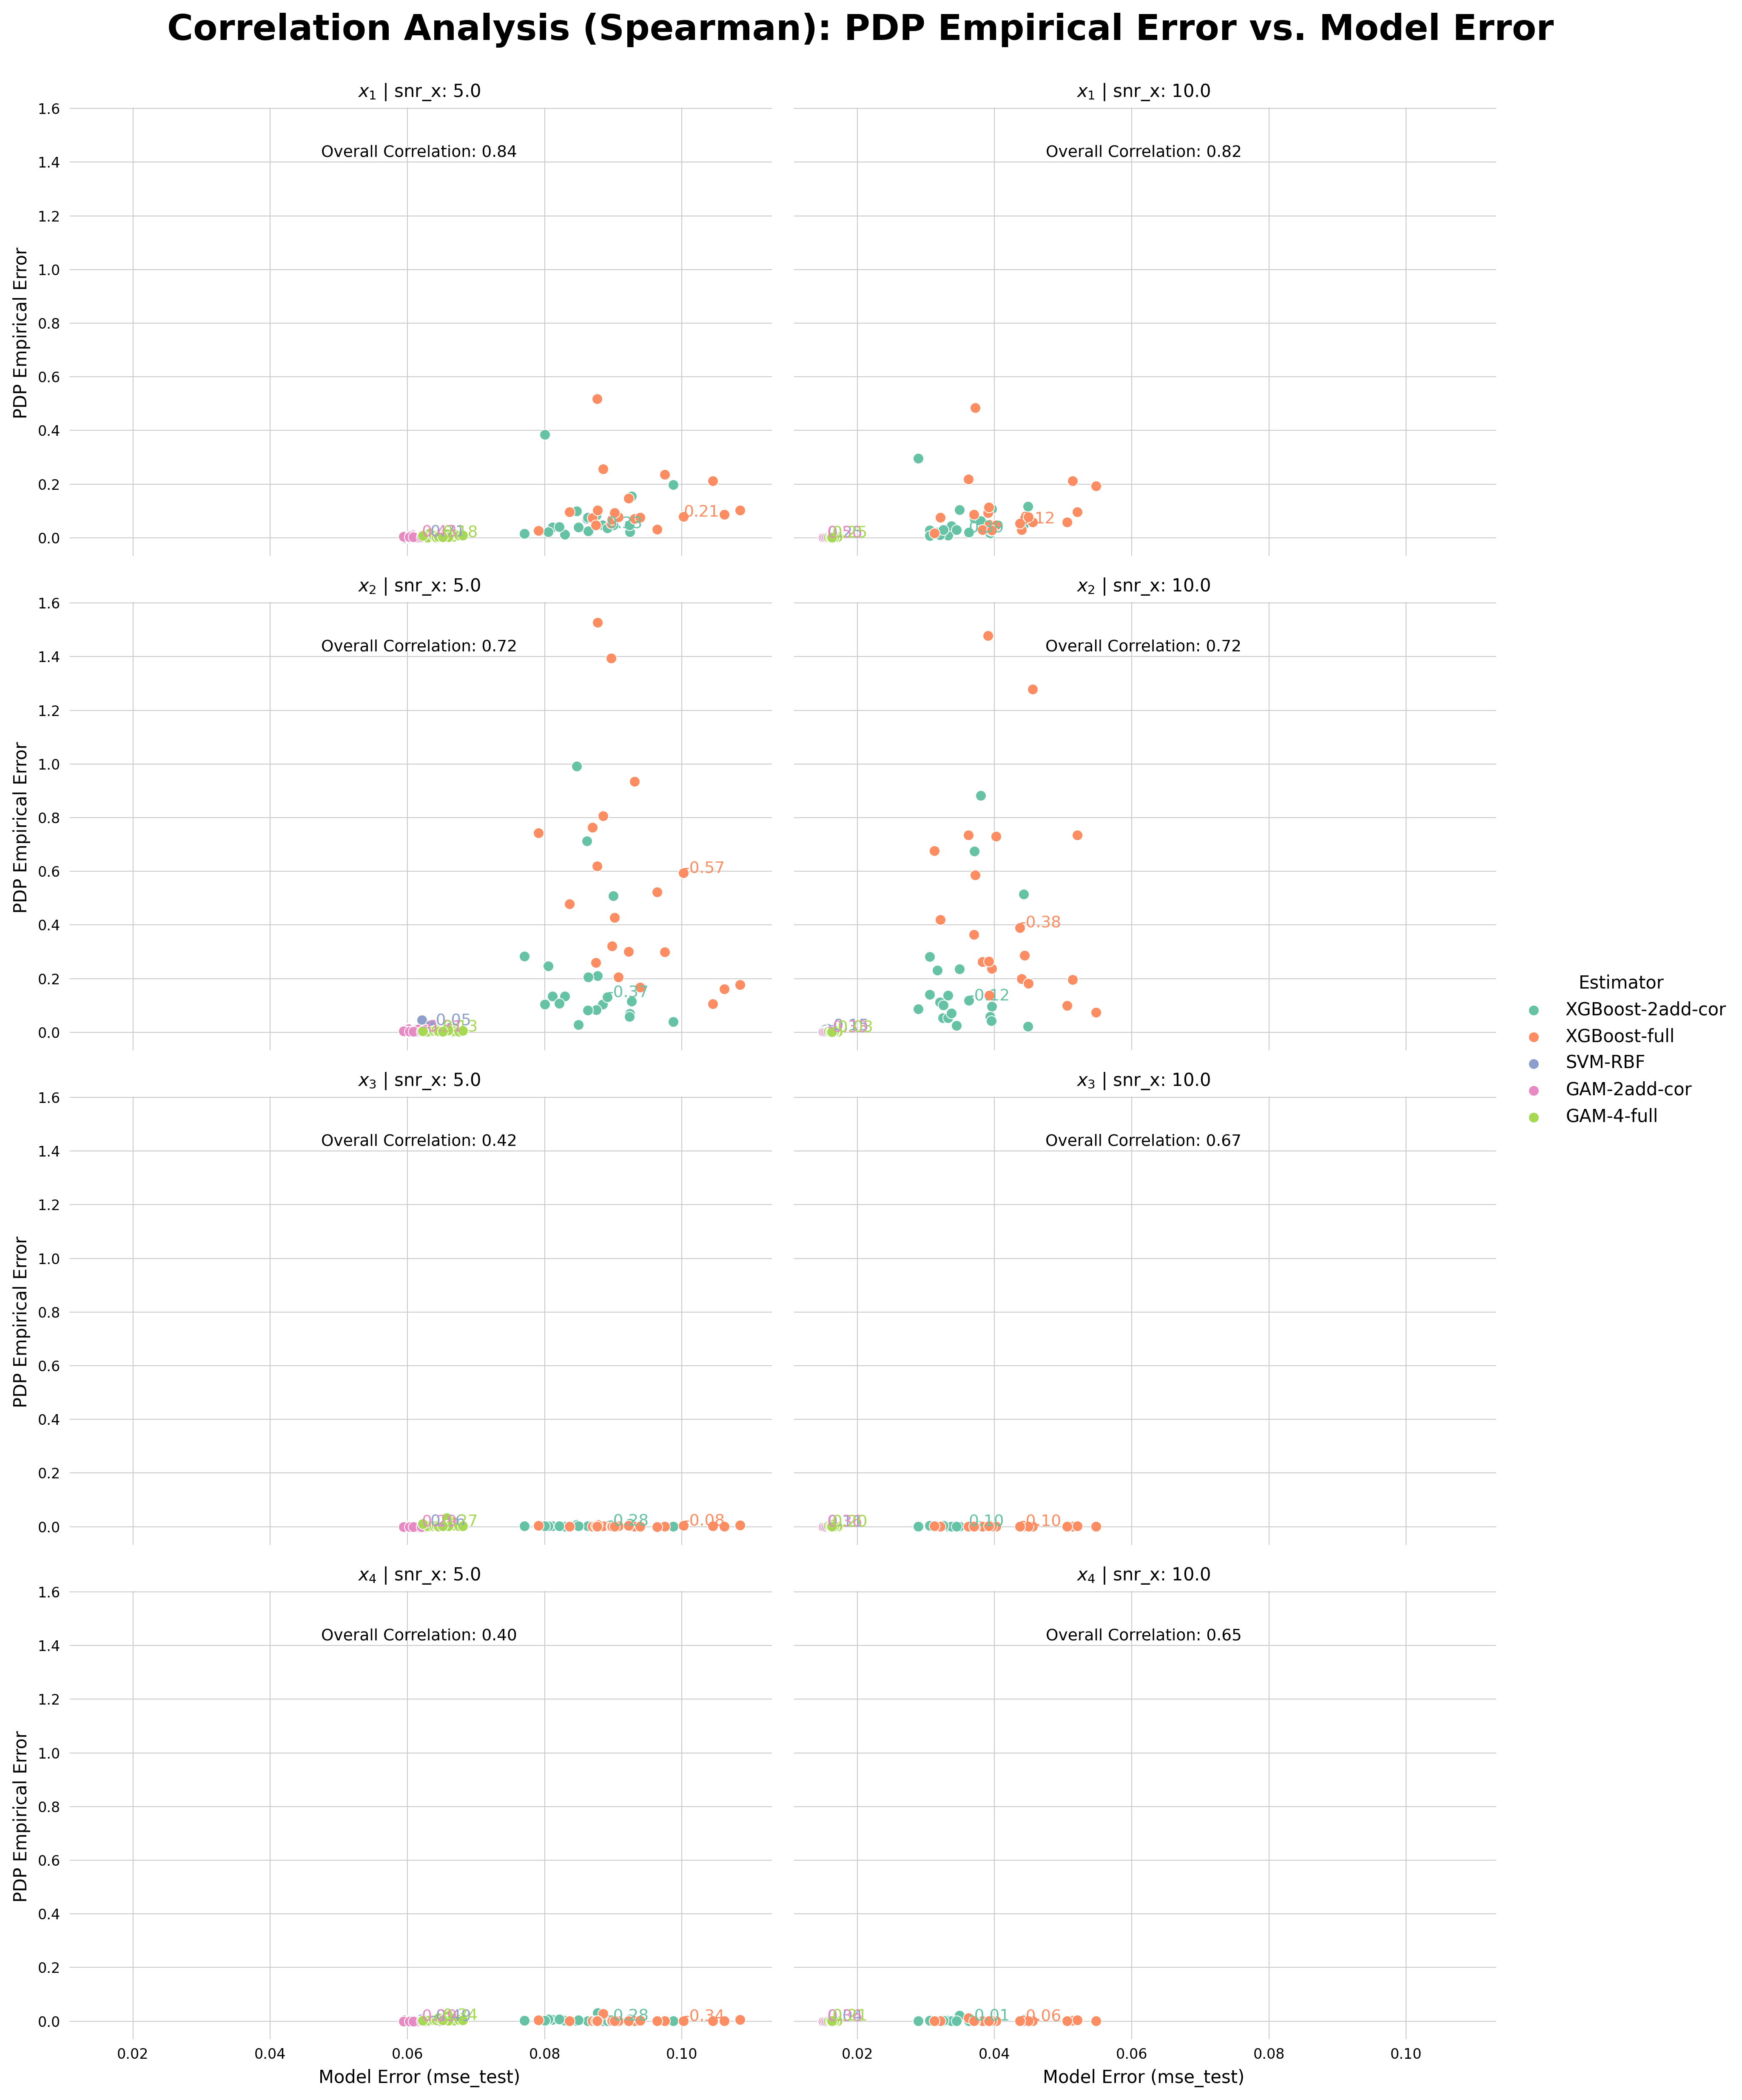

In [24]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [25]:
g;

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                        
x_1     5.0  Overall              0.843468
             XGBoost-2add-cor     0.327820
             XGBoost-full         0.209023
             SVM-RBF              0.705263
             GAM-2add-cor         0.434586
             GAM-4-full           0.178947
        10.0 Overall              0.818218
             XGBoost-2add-cor     0.389474
             XGBoost-full         0.118797
             SVM-RBF              0.251128
             GAM-2add-cor         0.499248
             GAM-4-full           0.245113
x_2     5.0  Overall              0.719568
             XGBoost-2add-cor    -0.371429
             XGBoost-full        -0.568421
             SVM-RBF             -0.051128
             GAM-2add-cor        -0.309774
             GAM-4-full           0.126316
        10.0 Overall              0.718296
             XGBoost-2add-cor    -0.120301
             XGBoost-full        -0.381955
             SVM-RBF             -0.153383
             GAM-2add-cor        -0.330827
             GAM-4-full          -0.030075
x_3     5.0  Overall              0.415098
             XGBoost-2add-cor    -0.284211
             XGBoost-full        -0.079699
             SVM-RBF              0.157895
             GAM-2add-cor         0.285714
             GAM-4-full           0.269173
        10.0 Overall              0.668683
             XGBoost-2add-cor     0.097744
             XGBoost-full        -0.102256
             SVM-RBF              0.108271
             GAM-2add-cor         0.359398
             GAM-4-full           0.201504
x_4     5.0  Overall              0.402772
             XGBoost-2add-cor    -0.275188
             XGBoost-full        -0.344361
             SVM-RBF             -0.490226
             GAM-2add-cor         0.285714
             GAM-4-full           0.336842
        10.0 Overall              0.647249
             XGBoost-2add-cor    -0.013534
             XGBoost-full        -0.063158
             SVM-RBF              0.042105
             GAM-2add-cor         0.359398
             GAM-4-full           0.209023

## Feature Effect Results

In [27]:
feauture_effect_type = "ale_results"

In [28]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.024720,0.057869,0.001533,0.002572
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.023843,0.078302,0.000929,0.001774
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000175,0.000304,0.000053,0.000025
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.000235,0.000230,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000124,0.000191,0.000239,0.000415


## Correlation Analysis

In [29]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,0.016685,0.034919,0.091095,0.133479,0.989853,0.976780,x_1,0.024720
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.005567,0.036209,0.058693,0.133297,0.996615,0.975922,x_1,0.023843
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.014414,0.015406,0.096147,0.099338,0.991234,0.989755,x_1,0.000175
3,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,0.014211,0.015390,0.094785,0.099012,0.991358,0.989766,x_1,0.000235
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.012737,0.016501,0.089752,0.102518,0.992254,0.989028,x_1,0.000124


c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


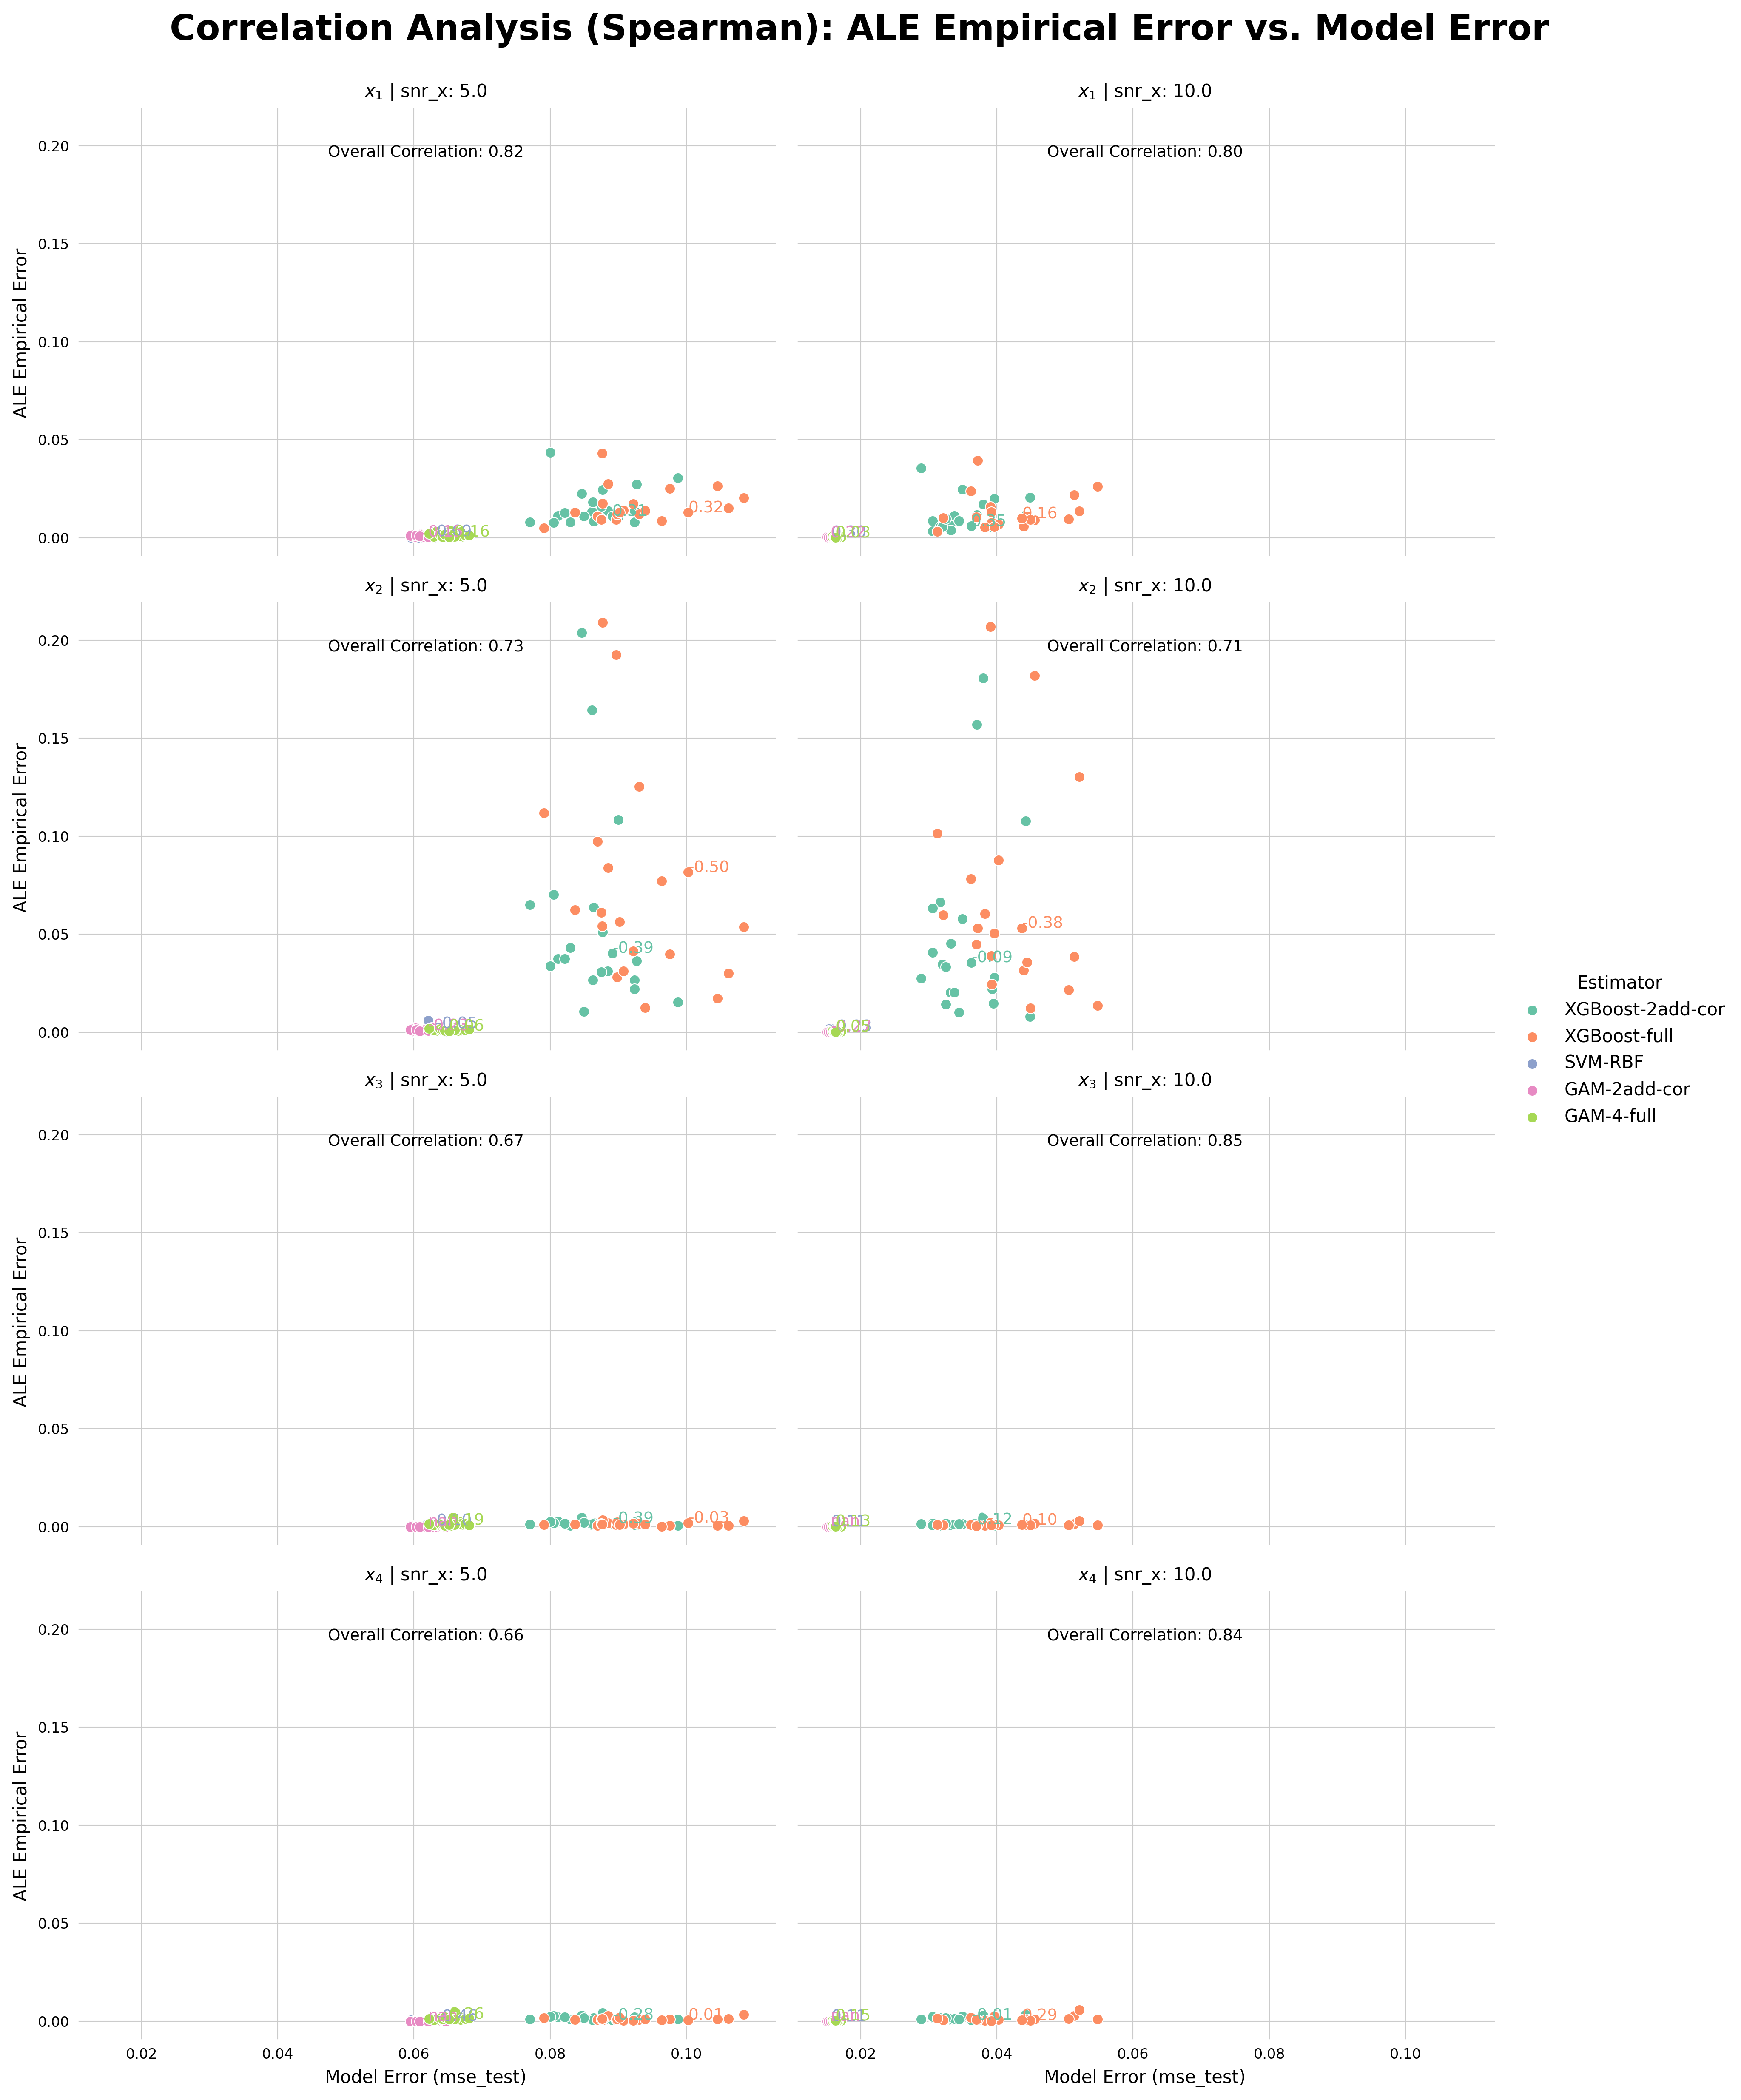

In [30]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [31]:
g;

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                        
x_1     5.0  Overall              0.821866
             XGBoost-2add-cor     0.306767
             XGBoost-full         0.324812
             SVM-RBF              0.688722
             GAM-2add-cor         0.147368
             GAM-4-full          -0.160902
        10.0 Overall              0.799256
             XGBoost-2add-cor     0.353383
             XGBoost-full         0.157895
             SVM-RBF              0.302256
             GAM-2add-cor         0.224060
             GAM-4-full           0.030075
x_2     5.0  Overall              0.729733
             XGBoost-2add-cor    -0.393985
             XGBoost-full        -0.503759
             SVM-RBF             -0.051128
             GAM-2add-cor        -0.234586
             GAM-4-full           0.061654
        10.0 Overall              0.709955
             XGBoost-2add-cor    -0.094737
             XGBoost-full        -0.383459
             SVM-RBF             -0.225564
             GAM-2add-cor        -0.266165
             GAM-4-full           0.051128
x_3     5.0  Overall              0.666999
             XGBoost-2add-cor    -0.390977
             XGBoost-full        -0.033083
             SVM-RBF              0.103759
             GAM-2add-cor              NaN
             GAM-4-full           0.186466
        10.0 Overall              0.850011
             XGBoost-2add-cor    -0.121805
             XGBoost-full         0.096241
             SVM-RBF              0.105263
             GAM-2add-cor              NaN
             GAM-4-full           0.129323
x_4     5.0  Overall              0.662710
             XGBoost-2add-cor    -0.281203
             XGBoost-full         0.006015
             SVM-RBF             -0.455639
             GAM-2add-cor              NaN
             GAM-4-full           0.255639
        10.0 Overall              0.843770
             XGBoost-2add-cor    -0.009023
             XGBoost-full         0.288722
             SVM-RBF              0.111278
             GAM-2add-cor              NaN
             GAM-4-full           0.145865